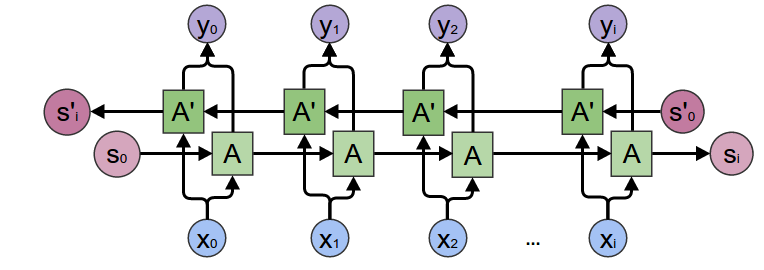

In [1]:
# Notebook created by: Nazmi Asri

# Bidirectional LSTM: extension of LSTM that can improve model performance 
#     on sequence classification problems

# In problems where all timesteps of the input sequence are available, 
# Bidirectional LSTMs train two instead of one LSTMs on the input sequence. 
# The first on the input sequence as-is and the second on a reversed copy of the input sequence. 
# This can provide additional context to the 
#     network and result in faster and even fuller learning on the problem.

# 6 Parts:
#     1) Bidirectional LSTMs
#     2) Sequence Classification Problem
#     3) LSTM for Sequence Classification
#     4) Bidirectional LSTM for Sequence Classification
#     5) Compare LSTM to Bidirectional LSTM
#     6) Comparing Bidirectional LSTM merge modes

# Source: http://machinelearningmastery.com/develop-bidirectional-lstm-sequence-classification-python-keras/

from IPython.display import Image
Image("RNN-bidirectional.png")

In [2]:
# Import dependencies
from random import random, seed
from numpy import array
from numpy import cumsum
from pandas import DataFrame
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import TimeDistributed
from keras.layers import Bidirectional

Using TensorFlow backend.


In [3]:
# Check TensorFlow and Keras version, should be TF 1.1.0+ and Keras 2.0.4+
import tensorflow
import keras

print("TensorFlow version: v" + tensorflow.__version__)
print("Keras version: v" + keras.__version__)

TensorFlow version: v1.1.0
Keras version: v2.0.4


In [4]:
# The idea of Bidirectional Recurrent Neural Network

# Duplicating the first layer of recurrent neural network and now they have two 
# layers side-by-side, and providing the input sequence as-is as input to the first layer,
# and providing the reverse input to the second layer

# Bidirectional RNN Train the data using all available input from the past information and future information
# RNN only capable of learning from the past information
# The idea came from how can we understand on what we heard, on something that hasn't been said yet
# It much more make sense with the light of future context

# Much more significantly effective than unidirectional RNN 

In [5]:
# Bidirectional LSTM in Keras

# Bidirectional LSTM are supported in Keras using Bidirectional wrapper
# it takes input as arguments, 
# and also the merge mode can be specify:
#     1. sum: the output is added together
#     2. mul: the output is multiplied together
#     3. concat: the output is concatenated 
#     4. ave: avg output is taken (default)

In [12]:
# Sequence Classification Problem (without RNN)

# Create a sequence classification instance
def get_sequence(n_timesteps):
	# create a sequence of random numbers in [0,1]
	X = array([random() for _ in range(n_timesteps)])
	# calculate cut-off value to change class values
	limit = n_timesteps/4.0
	# determine the class outcome for each item in cumulative sequence
	y = array([0 if x < limit else 1 for x in cumsum(X)])
	return X, y

# Print the results
X, y = get_sequence(10)
print(X)
print(y)

[ 0.8357651   0.43276707  0.76228008  0.00210605  0.44538719  0.72154003
  0.22876222  0.9452707   0.90142746  0.03058998]
[0 0 0 0 0 1 1 1 1 1]


In [7]:
# LSTM for Sequence Classification Problem

# Create a sequence classification instance
def get_sequence(n_timesteps):
	# Define seed for consistent random value
	seed(1)
	# create a sequence of random numbers in [0,1]
	X = array([random() for _ in range(n_timesteps)])
	# calculate cut-off value to change class values
	limit = n_timesteps/4.0
	# determine the class outcome for each item in cumulative sequence
	y = array([0 if x < limit else 1 for x in cumsum(X)])
	# reshape input and output data to be suitable for LSTMs
	X = X.reshape(1, n_timesteps, 1)
	y = y.reshape(1, n_timesteps, 1)
	return X, y

# For now we have 10 timesteps
n_timesteps = 10

# Reshape input and output data to be suitable for LSTMs [samples, timesteps, features]
X,y = get_sequence(n_timesteps)
X = X.reshape(1, n_timesteps, 1)
y = y.reshape(1, n_timesteps, 1)

# Define LSTM
# TimeDistributed wrapper is used so one value per timestamps can be predicted,
# given full sequence is provided as the input. 
# This required the LSTM hidden layer to return a sequence of values (one per timestamp)
# rather than single value for the whole input sequence
# Because this is a binary classification problem, we use binary cross entropy 
model = Sequential()
model.add(LSTM(20, input_shape=(n_timesteps, 1), return_sequences=True))
model.add(TimeDistributed(Dense(1, activation='sigmoid')))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

# Train LSTM
for epoch in range(1000):
	# generate new random sequence
    # we don't want the model just memorize single sequence
	X,y = get_sequence(n_timesteps)
	# fit model for one epoch on this sequence
	model.fit(X, y, epochs=1, batch_size=1, verbose=2)
    
# Evaluate LSTM
yhat = model.predict_classes(X, verbose=0)
for i in range(n_timesteps):
	print('Expected:', y[0, i], 'Predicted', yhat[0, i])

Epoch 1/1
1s - loss: 0.6933 - acc: 0.5000
Epoch 1/1
0s - loss: 0.6919 - acc: 0.5000
Epoch 1/1
0s - loss: 0.6905 - acc: 0.5000
Epoch 1/1
0s - loss: 0.6891 - acc: 0.5000
Epoch 1/1
0s - loss: 0.6877 - acc: 0.5000
Epoch 1/1
0s - loss: 0.6864 - acc: 0.5000
Epoch 1/1
0s - loss: 0.6850 - acc: 0.5000
Epoch 1/1
0s - loss: 0.6837 - acc: 0.5000
Epoch 1/1
0s - loss: 0.6825 - acc: 0.5000
Epoch 1/1
0s - loss: 0.6812 - acc: 0.5000
Epoch 1/1
0s - loss: 0.6800 - acc: 0.5000
Epoch 1/1
0s - loss: 0.6787 - acc: 0.5000
Epoch 1/1
0s - loss: 0.6775 - acc: 0.5000
Epoch 1/1
0s - loss: 0.6762 - acc: 0.5000
Epoch 1/1
0s - loss: 0.6750 - acc: 0.5000
Epoch 1/1
0s - loss: 0.6738 - acc: 0.5000
Epoch 1/1
0s - loss: 0.6726 - acc: 0.5000
Epoch 1/1
0s - loss: 0.6713 - acc: 0.5000
Epoch 1/1
0s - loss: 0.6701 - acc: 0.5000
Epoch 1/1
0s - loss: 0.6688 - acc: 0.5000
Epoch 1/1
0s - loss: 0.6675 - acc: 0.5000
Epoch 1/1
0s - loss: 0.6663 - acc: 0.5000
Epoch 1/1
0s - loss: 0.6649 - acc: 0.5000
Epoch 1/1
0s - loss: 0.6636 - acc:

In [8]:
# Bidirectional LSTM for Sequence Classification Problem

# Reinitialize X and y
X,y = get_sequence(n_timesteps)
X = X.reshape(1, n_timesteps, 1)
y = y.reshape(1, n_timesteps, 1)

# Define Bidirectional LSTM
# By adding Bidirectional wrapper, this will create 2 copies of the LSTM layer, one fit for the 
# input sequence as-is, and another one on a reversed copy of input sequence

# This means that instead of TimeDistributed received 10 timesteps of 20 input (because of bidirectional)
# it will now received 10 timesteps of 40 inputs (20 units + 20 units) outputs 
model_bLSTM = Sequential()
model_bLSTM.add(Bidirectional(LSTM(n_timesteps*2, return_sequences=True), input_shape=(n_timesteps, 1)))
model_bLSTM.add(TimeDistributed(Dense(1, activation='sigmoid')))
model_bLSTM.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

# Train Bidirectional LSTM
for epoch in range(1000):
	# generate new random sequence
    # we don't want the model just memorize single sequence
	X,y = get_sequence(n_timesteps)
	# fit model for one epoch on this sequence
	model_bLSTM.fit(X, y, epochs=1, batch_size=1, verbose=2)

# Evaluate LSTM
yhat = model_bLSTM.predict_classes(X, verbose=0)
for i in range(n_timesteps):
	print('Expected:', y[0, i], 'Predicted', yhat[0, i])

Epoch 1/1
2s - loss: 0.6886 - acc: 0.5000
Epoch 1/1
0s - loss: 0.6864 - acc: 0.5000
Epoch 1/1
0s - loss: 0.6842 - acc: 0.5000
Epoch 1/1
0s - loss: 0.6820 - acc: 0.5000
Epoch 1/1
0s - loss: 0.6799 - acc: 0.5000
Epoch 1/1
0s - loss: 0.6777 - acc: 0.6000
Epoch 1/1
0s - loss: 0.6755 - acc: 0.6000
Epoch 1/1
0s - loss: 0.6732 - acc: 0.6000
Epoch 1/1
0s - loss: 0.6710 - acc: 0.7000
Epoch 1/1
0s - loss: 0.6688 - acc: 0.7000
Epoch 1/1
0s - loss: 0.6665 - acc: 0.7000
Epoch 1/1
0s - loss: 0.6642 - acc: 0.7000
Epoch 1/1
0s - loss: 0.6618 - acc: 0.7000
Epoch 1/1
0s - loss: 0.6594 - acc: 0.7000
Epoch 1/1
0s - loss: 0.6570 - acc: 0.7000
Epoch 1/1
0s - loss: 0.6545 - acc: 0.7000
Epoch 1/1
0s - loss: 0.6519 - acc: 0.7000
Epoch 1/1
0s - loss: 0.6493 - acc: 0.7000
Epoch 1/1
0s - loss: 0.6466 - acc: 0.7000
Epoch 1/1
0s - loss: 0.6438 - acc: 0.8000
Epoch 1/1
0s - loss: 0.6409 - acc: 0.8000
Epoch 1/1
0s - loss: 0.6380 - acc: 0.8000
Epoch 1/1
0s - loss: 0.6349 - acc: 0.8000
Epoch 1/1
0s - loss: 0.6317 - acc:

<IPython.core.display.Javascript object>


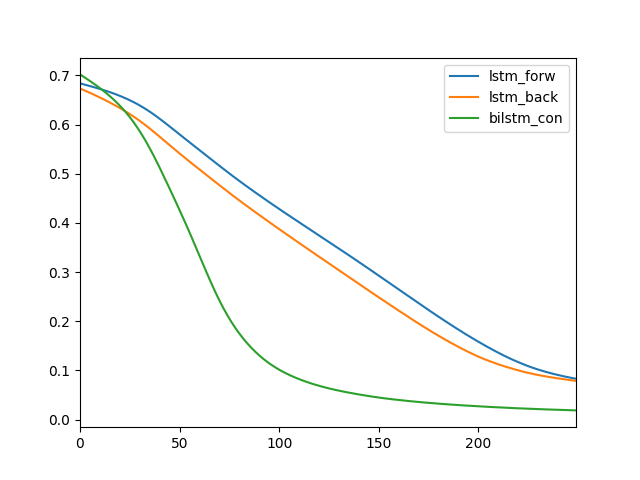

In [11]:
%matplotlib notebook
# Compare LSTM to Bidirectional LSTM

def get_lstm_model(n_timesteps, backwards):
	model = Sequential()
	model.add(LSTM(20, input_shape=(n_timesteps, 1), return_sequences=True, go_backwards=backwards))
	model.add(TimeDistributed(Dense(1, activation='sigmoid')))
	model.compile(loss='binary_crossentropy', optimizer='adam')
	return model

def get_bi_lstm_model(n_timesteps, mode):
	model = Sequential()
	model.add(Bidirectional(LSTM(20, return_sequences=True), input_shape=(n_timesteps, 1), merge_mode=mode))
	model.add(TimeDistributed(Dense(1, activation='sigmoid')))
	model.compile(loss='binary_crossentropy', optimizer='adam')
	return model

def train_model(model, n_timesteps):
	loss = list()
	for _ in range(250):
		# generate new random sequence
		X,y = get_sequence(n_timesteps)
		# fit model for one epoch on this sequence
		hist = model.fit(X, y, epochs=1, batch_size=1, verbose=0)
		loss.append(hist.history['loss'][0])
	return loss

n_timesteps = 10
results = DataFrame()
# lstm forwards
model = get_lstm_model(n_timesteps, False)
results['lstm_forw'] = train_model(model, n_timesteps)
# lstm backwards
model = get_lstm_model(n_timesteps, True)
results['lstm_back'] = train_model(model, n_timesteps)
# bidirectional concat
model = get_bi_lstm_model(n_timesteps, 'concat')
results['bilstm_con'] = train_model(model, n_timesteps)
# line plot of results
results.plot()
pyplot.show()

<IPython.core.display.Javascript object>


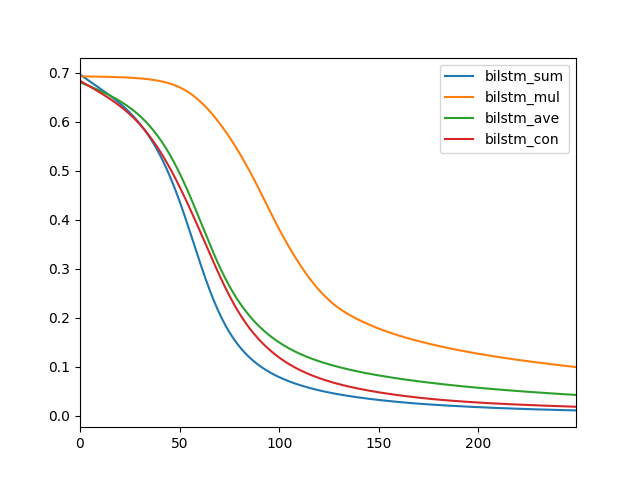

In [10]:
%matplotlib notebook
# Comparing Bidirectional LSTM merge modes

n_timesteps = 10
results = DataFrame()
# sum merge
model = get_bi_lstm_model(n_timesteps, 'sum')
results['bilstm_sum'] = train_model(model, n_timesteps)
# mul merge
model = get_bi_lstm_model(n_timesteps, 'mul')
results['bilstm_mul'] = train_model(model, n_timesteps)
# avg merge
model = get_bi_lstm_model(n_timesteps, 'ave')
results['bilstm_ave'] = train_model(model, n_timesteps)
# concat merge
model = get_bi_lstm_model(n_timesteps, 'concat')
results['bilstm_con'] = train_model(model, n_timesteps)
# line plot of results
results.plot()
pyplot.show()